[Reference](https://towardsdatascience.com/3-simple-outlier-anomaly-detection-algorithms-every-data-scientist-needs-e71b1304a932)

In [4]:
import numpy as np
# Data with no outliers
print(np.array([35,20,32,40,46,45]).mean())

# Data with 2 outliers
print(np.array([1,35,20,32,40,46,45,4500]).mean())

36.333333333333336
589.875


# Solution 1: DBSCAN

In [5]:
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [6]:
dbscan.labels_

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])

knn.predict(X_new)

array([0, 1, 0, 1])

In [8]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  1,  0, -1])

# Solution 2: IsolationForest

In [9]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
import pandas as pd

In [10]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'

df = pd.read_csv(url, header=None)

data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)

mean_absolute_error(lr.predict(X),y)

3.2708628109003195

In [12]:
iso = IsolationForest(contamination='auto',random_state=42)

In [13]:
y_pred = iso.fit_predict(X,y)
mask = y_pred != -1

In [14]:
X,y = X[mask,:],y[mask]

In [15]:
lr.fit(X,y)
mean_absolute_error(lr.predict(X),y)

2.8324609726366408

# Solution 3: Boxplots + The Tuckey Method

![photo](https://miro.medium.com/max/854/1*fgvbj0oSgv8otYNM6Ui2jg.png)

```
IQR = Q3 - Q1
Q3: third quartile
Q1: first quartile
```

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
X = np.array([45,56,78,34,1,2,67,68,87,203,-200,-150])
y = np.array([1,1,0,0,1,0,1,1,0,0,1,1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


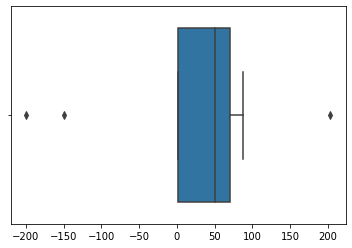

In [17]:
sns.boxplot(X)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


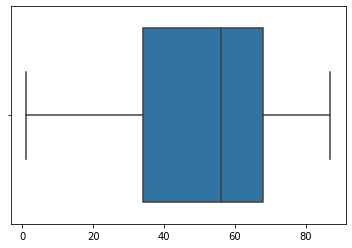

In [19]:
X = X[(X < 150) & (X > -50)]
sns.boxplot(X)
plt.show()

In [21]:
import numpy as np
from collections import Counter

def detect_outliers(df, n, features):
    # list to store outlier indices
    outlier_indices = []

    # iterate over features(columns)  

    for col in features:
        # Get the 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # Get the 3rd quartile (75%)
        Q3 = np.percentile(df[col], 75)
        # Get the Interquartile range (IQR)
        IQR = Q3 - Q1        
        # Define our outlier step
        outlier_step = 1.5 * IQR       
        # Determine a list of indices of outliers      
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) |     (df[col] > Q3 + outlier_step)].index   
        
        # append outlier indices for column to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)   
    
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
    
    return multiple_outliers

# detect outliers from list of features
list_of_features = ['x1', 'x2']
# params dataset, number of outliers for rejection, list of features 
Outliers_to_drop = detect_outliers(dataset, 2, list_of_features)